In [1]:
!pip install pandas numpy matplotlib seaborn nltk scikit-learn

In [2]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.cluster import KMeans

In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
file_path = '/content/drive/MyDrive/yelp_academic_dataset_business.json'
import os

print(os.path.exists(file_path))  # This should return True


True


In [7]:
import json
import pandas as pd

businesses = []
with open(file_path, encoding='utf-8') as f:
    for line in f:
        businesses.append(json.loads(line))



business_df = pd.DataFrame(businesses)
business_df.head() # Display the first few rows of the DataFrame


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


In [8]:

business_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150346 entries, 0 to 150345
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   business_id   150346 non-null  object 
 1   name          150346 non-null  object 
 2   address       150346 non-null  object 
 3   city          150346 non-null  object 
 4   state         150346 non-null  object 
 5   postal_code   150346 non-null  object 
 6   latitude      150346 non-null  float64
 7   longitude     150346 non-null  float64
 8   stars         150346 non-null  float64
 9   review_count  150346 non-null  int64  
 10  is_open       150346 non-null  int64  
 11  attributes    136602 non-null  object 
 12  categories    150243 non-null  object 
 13  hours         127123 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 16.1+ MB


In [9]:
# Extract unique categories
categories = set()
for business in businesses:
    if 'categories' in business and business['categories']:
        categories.update(business['categories'].split(', '))

# Count the number of unique categories
num_categories = len(categories)

# Print the number of unique categories and their names
print(f'Number of unique categories: {num_categories}')
print('Unique categories:', categories)


Number of unique categories: 1311
Unique categories: {'Nanny Services', 'Cambodian', 'Shaved Snow', 'Audio/Visual Equipment Rental', 'Speech Therapists', 'Grill Services', 'Cuban', 'Flowers & Gifts', 'Security Systems', 'Dance Schools', 'Ski Schools', 'Cantonese', 'Party Supplies', 'Art Supplies', 'Gold Buyers', 'Personal Chefs', 'Libraries', 'Golf Cart Rentals', 'Vegan', 'Luggage', 'High Fidelity Audio Equipment', 'Notaries', 'Outdoor Movies', 'Mobile Dent Repair', 'Hotels & Travel', 'Supper Clubs', 'Hockey Equipment', 'Medical Centers', 'New Mexican Cuisine', 'Engraving', 'Beer', 'Soccer', 'Dialysis Clinics', 'Juice Bars & Smoothies', 'Motorcycle Dealers', 'Bowling', 'Oriental', 'Environmental Testing', 'Used Car Dealers', 'Boat Charters', 'Kitchen Supplies', 'Billing Services', 'Garage Door Services', 'Wigs', 'Trailer Dealers', 'Aircraft Dealers', 'Olive Oil', 'Internet Service Providers', 'Massage', 'Roadside Assistance', 'Public Transportation', 'Smokehouse', 'Grout Services', 'Ae

In [10]:
file_path = '/content/drive/MyDrive/yelp_academic_dataset_review.json'
import os

print(os.path.exists(file_path))

True


In [11]:
import os

# Define the path to  Yelp review dataset
review_file_path = '/content/drive/MyDrive/yelp_academic_dataset_review.json'

# Check the file size
file_size = os.path.getsize(review_file_path)
print(f"File size: {file_size / (1024 * 1024):.2f} MB")  # Convert bytes to MB


File size: 5094.40 MB


In [12]:
import pandas as pd
import json

# Define the path to Yelp review dataset
review_file_path = '/content/drive/MyDrive/yelp_academic_dataset_review.json'

# Load only the first line to check the structure
with open(review_file_path, encoding='utf-8') as f:
    first_line = f.readline()  # Read the first line

# Load the first JSON object to see the keys (column names)
first_review = json.loads(first_line)
print("Column names:", list(first_review.keys()))


Column names: ['review_id', 'user_id', 'business_id', 'stars', 'useful', 'funny', 'cool', 'text', 'date']


In [14]:
import pandas as pd
import json

# Define the path to  Yelp review dataset
review_file_path = '/content/drive/MyDrive/yelp_academic_dataset_review.json'

# Load a limited number of lines (e.g., the first 1000)
sample_reviews = []
with open(review_file_path, encoding='utf-8') as f:
    for i, line in enumerate(f):
        if i >= 1000:  # Limit to the first 1000 lines
            break
        sample_reviews.append(json.loads(line))

# Convert the sample list of dictionaries to a pandas DataFrame
sample_reviews_df = pd.DataFrame(sample_reviews)

# Display the first few rows of the sample DataFrame
sample_reviews_df.head()


,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


In [28]:


# Filter to keep relevant columns
business_df_filtered = business_df[['business_id', 'name', 'categories', 'stars']]
review_df_filtered = sample_reviews_df[['business_id', 'text', 'stars']]

# Rename the stars column in the review dataset
review_df_filtered.rename(columns={'stars': 'review_stars'}, inplace=True)

# Merge the datasets
merged_df = pd.merge(review_df_filtered, business_df_filtered, on='business_id', how='inner')

# Display the merged dataset
merged_df.head()




<ipython-input-28-0d00288ff917>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  review_df_filtered.rename(columns={'stars': 'review_stars'}, inplace=True)


,business_id,text,review_stars,name,categories,stars
0,XQfwVwDr-v0ZS3_CbbE5Xw,"If you decide to eat here, just be aware it is...",3.0,Turning Point of North Wales,"Restaurants, Breakfast & Brunch, Food, Juice B...",3.0
1,7ATYjTIgM3jUlt4UM3IypQ,I've taken a lot of spin classes over the year...,5.0,Body Cycle Spinning Studio,"Active Life, Cycling Classes, Trainers, Gyms, ...",5.0
2,YjUWPpI6HXG530lwP-fb2A,Family diner. Had the buffet. Eclectic assortm...,3.0,Kettle Restaurant,"Restaurants, Breakfast & Brunch",3.5
3,kxX2SOes4o-D3ZQBkiMRfA,"Wow! Yummy, different, delicious. Our favo...",5.0,Zaika,"Halal, Pakistani, Restaurants, Indian",4.0
4,kxX2SOes4o-D3ZQBkiMRfA,Dine-in gets 2 stars. Disappointing service & ...,2.0,Zaika,"Halal, Pakistani, Restaurants, Indian",4.0


In [31]:
merged_df.shape

(1000, 6)

In [25]:
# Check the structure of the review dataset
with open(review_file_path, encoding='utf-8') as f:
    first_line = f.readline()  # Read the first line

# Load the first JSON object to see the keys (column names)
first_review = json.loads(first_line)
print("Column names:", list(first_review.keys()))

Column names: ['review_id', 'user_id', 'business_id', 'stars', 'useful', 'funny', 'cool', 'text', 'date']


In [35]:
# Filter for restaurants (if 'categories' exist)
restaurant_open_df = merged_df[
    merged_df['categories'].str.contains('Restaurant', case=False, na=False)
]

# Display the filtered DataFrame
print("Filtered restaurant DataFrame head:")
restaurant_open_df.head()









Filtered restaurant DataFrame head:


,business_id,text,review_stars,name,categories,stars
0,XQfwVwDr-v0ZS3_CbbE5Xw,"If you decide to eat here, just be aware it is...",3.0,Turning Point of North Wales,"Restaurants, Breakfast & Brunch, Food, Juice B...",3.0
2,YjUWPpI6HXG530lwP-fb2A,Family diner. Had the buffet. Eclectic assortm...,3.0,Kettle Restaurant,"Restaurants, Breakfast & Brunch",3.5
3,kxX2SOes4o-D3ZQBkiMRfA,"Wow! Yummy, different, delicious. Our favo...",5.0,Zaika,"Halal, Pakistani, Restaurants, Indian",4.0
4,kxX2SOes4o-D3ZQBkiMRfA,Dine-in gets 2 stars. Disappointing service & ...,2.0,Zaika,"Halal, Pakistani, Restaurants, Indian",4.0
5,kxX2SOes4o-D3ZQBkiMRfA,After a long hiatus from reviewing I have awak...,5.0,Zaika,"Halal, Pakistani, Restaurants, Indian",4.0


In [36]:
restaurant_open_df.shape

(716, 6)

In [ ]:
########.    Step 1: Data Preparation

In [38]:
# Check for missing values
print(restaurant_open_df.isnull().sum())

# Drop any rows with missing values in the important columns
restaurant_open_df.dropna(subset=['text', 'stars'], inplace=True)

# Reset the index after dropping rows
restaurant_open_df.reset_index(drop=True, inplace=True)

# Display the shape of the cleaned DataFrame
print("Cleaned DataFrame shape:", restaurant_open_df.shape)

# Sample cleaned data
print(restaurant_open_df.head())


business_id     0
text            0
review_stars    0
name            0
categories      0
stars           0
dtype: int64
Cleaned DataFrame shape: (716, 6)
              business_id                                               text  \
0  XQfwVwDr-v0ZS3_CbbE5Xw  If you decide to eat here, just be aware it is...   
1  YjUWPpI6HXG530lwP-fb2A  Family diner. Had the buffet. Eclectic assortm...   
2  kxX2SOes4o-D3ZQBkiMRfA  Wow!  Yummy, different,  delicious.   Our favo...   
3  kxX2SOes4o-D3ZQBkiMRfA  Dine-in gets 2 stars. Disappointing service & ...   
4  kxX2SOes4o-D3ZQBkiMRfA  After a long hiatus from reviewing I have awak...   

   review_stars                          name  \
0           3.0  Turning Point of North Wales   
1           3.0             Kettle Restaurant   
2           5.0                         Zaika   
3           2.0                         Zaika   
4           5.0                         Zaika   

                                          categories  stars  
0  Rest

<ipython-input-38-0e80a9d75ba1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  restaurant_open_df.dropna(subset=['text', 'stars'], inplace=True)


In [81]:
import pandas as pd

# Sample data
data = {
    "business_id": [
        "XQfwVwDr-v0ZS3_CbbE5Xw",
        "YjUWPpI6HXG530lwP-fb2A",
        "kxX2SOes4o-D3ZQBkiMRfA",
        "kxX2SOes4o-D3ZQBkiMRfA",
        "kxX2SOes4o-D3ZQBkiMRfA"
    ],
    "text": [
        "If you decide to eat here, just be aware it is...",
        "Family diner. Had the buffet. Eclectic assortment...",
        "Wow! Yummy, different, delicious. Our favorite!",
        "Dine-in gets 2 stars. Disappointing service & ...",
        "After a long hiatus from reviewing I have awakened..."
    ],
    "review_stars": [3.0, 3.0, 5.0, 2.0, 5.0],
    "name": [
        "Turning Point of North Wales",
        "Kettle Restaurant",
        "Zaika",
        "Zaika",
        "Zaika"
    ],
    "categories": [
        "Restaurants, Breakfast & Brunch, Food, Juice Bar",
        "Restaurants, Breakfast & Brunch",
        "Halal, Pakistani, Restaurants, Indian",
        "Halal, Pakistani, Restaurants, Indian",
        "Halal, Pakistani, Restaurants, Indian"
    ],
    "stars": [3.0, 3.5, 4.0, 4.0, 4.0]
}

# Create a DataFrame
restaurant_open_df = pd.DataFrame(data)

# Extract unique categories
# Split categories by comma and flatten the list, then create a set to get unique types
unique_categories = set()

# Iterate over the categories to extract unique ones
for categories in restaurant_open_df['categories']:
    for category in categories.split(','):
        unique_categories.add(category.strip())

# Display the unique restaurant types
print("Different restaurant types found in the dataset:")
for category in unique_categories:
    print(category)


Different restaurant types found in the dataset:
Restaurants
Indian
Juice Bar
Pakistani
Food
Breakfast & Brunch
Halal


In [40]:
##### Step 2: Sentiment Analysis



from textblob import TextBlob

# Function to classify sentiment
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis to the review text
restaurant_open_df['sentiment'] = restaurant_open_df['text'].apply(get_sentiment)

restaurant_open_df.head()


<ipython-input-40-d635433a0f7b>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  restaurant_open_df['sentiment'] = restaurant_open_df['text'].apply(get_sentiment)


,business_id,text,review_stars,name,categories,stars,sentiment
0,XQfwVwDr-v0ZS3_CbbE5Xw,"If you decide to eat here, just be aware it is...",3.0,Turning Point of North Wales,"Restaurants, Breakfast & Brunch, Food, Juice B...",3.0,Positive
1,YjUWPpI6HXG530lwP-fb2A,Family diner. Had the buffet. Eclectic assortm...,3.0,Kettle Restaurant,"Restaurants, Breakfast & Brunch",3.5,Positive
2,kxX2SOes4o-D3ZQBkiMRfA,"Wow! Yummy, different, delicious. Our favo...",5.0,Zaika,"Halal, Pakistani, Restaurants, Indian",4.0,Positive
3,kxX2SOes4o-D3ZQBkiMRfA,Dine-in gets 2 stars. Disappointing service & ...,2.0,Zaika,"Halal, Pakistani, Restaurants, Indian",4.0,Positive
4,kxX2SOes4o-D3ZQBkiMRfA,After a long hiatus from reviewing I have awak...,5.0,Zaika,"Halal, Pakistani, Restaurants, Indian",4.0,Positive


In [41]:
from textblob import TextBlob

# Function to classify sentiment
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis to the review text
restaurant_open_df['sentiment'] = restaurant_open_df['text'].apply(get_sentiment)

# Display the first few rows with sentiment
restaurant_open_df[['text', 'sentiment']].head()


<ipython-input-41-e121454fa70b>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  restaurant_open_df['sentiment'] = restaurant_open_df['text'].apply(get_sentiment)


,text,sentiment
0,"If you decide to eat here, just be aware it is...",Positive
1,Family diner. Had the buffet. Eclectic assortm...,Positive
2,"Wow! Yummy, different, delicious. Our favo...",Positive
3,Dine-in gets 2 stars. Disappointing service & ...,Positive
4,After a long hiatus from reviewing I have awak...,Positive


sentiment
positive    644
negative     70
neutral       2
Name: count, dtype: int64


<ipython-input-61-082384f4c3f8>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')


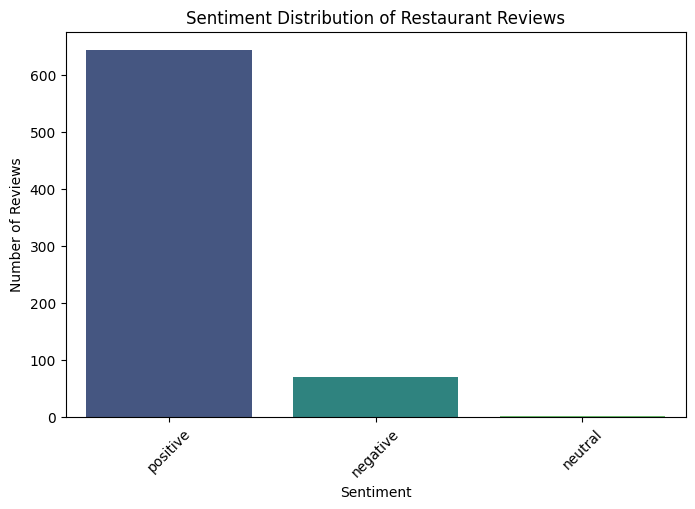

In [61]:
#####   Step 3: Analyze Sentiment Results


import matplotlib.pyplot as plt
import seaborn as sns

# Count sentiment categories

# Display the counts
print(sentiment_counts)

# Plot the sentiment distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')
plt.title('Sentiment Distribution of Restaurant Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.show()


In [57]:
# Check for missing values in the 'text' column
print(restaurant_open_df['text'].isnull().sum())


0


In [58]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob

# Download necessary NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize stop words and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    # Remove punctuation and numbers
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)

    # Tokenize
    words = text.lower().split()

    # Remove stop words and lemmatize
    cleaned_words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]

    return ' '.join(cleaned_words)

# Check for missing values
print(restaurant_open_df['text'].isnull().sum())

# Apply the cleaning function
restaurant_open_df['cleaned_text'] = restaurant_open_df['text'].apply(clean_text)

# Function to classify sentiment
def get_sentiment(text):
    try:
        analysis = TextBlob(text)
        if analysis.sentiment.polarity > 0:
            return 'positive'
        elif analysis.sentiment.polarity < 0:
            return 'negative'
        else:
            return 'neutral'
    except Exception as e:
        return 'error'

# Apply the sentiment function
restaurant_open_df['sentiment'] = restaurant_open_df['cleaned_text'].apply(get_sentiment)

# Check the sentiment distribution
restaurant_open_df.value_counts()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0


<ipython-input-58-f18dbb92af58>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  restaurant_open_df['cleaned_text'] = restaurant_open_df['text'].apply(clean_text)
<ipython-input-58-f18dbb92af58>:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  restaurant_open_df['sentiment'] = restaurant_open_df['cleaned_text'].apply(get_sentiment)


business_id             text                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              review_stars  name                       categories                                                                                       stars  sentiment  cleaned_text                                                                                                                                                                                                                                                                                                                                           
-ATiAtTikuGuqvaW2O6tNA  Great atmosphere, service was very friendly and prices were very reasonable however I found the food a bit bland, not bad just bland. My husband and I were starving after a long drive to Philly and this filled the spot but it wasn't overly enjoyable and we most likely won't be back.                                                                                                                                                                                                                                                                                       3.0           Marathon                   Sandwiches, American (New), Lounges, Nightlife, Bars, Restaurants, Breakfast & Brunch            3.5    positive   great atmosphere service friendly price reasonable however found food bit bland bad bland husband starving long drive philly filled spot wasnt overly enjoyable likely wont back                                                                                                                                                                           1
fa6InRseC0Uxnt5d90E3LQ  Exactly as bougie and casual at the same time as you need it to be. Come with your Gucci bag or in your yoga pants and slam a delicious cocktail or three.                                                                                                                                                                                                                                                                                                                                                                                                                        5.0           Trophy Fish                Nightlife, Bars, Seafood, Restaurants                                                            4.0    positive   exactly bougie casual time need come gucci bag yoga pant slam delicious cocktail three                                                                                                                                                                                                                                                                     1
dpwkz52tHB2MCPv53I2aRA  Sweet and sour chicken and chicken chow mein were both excellent. I like the chicken cuts in the chow mein. Have also tried the sushi a few times and enjoyed it. A little pricey, but at least it's great food.                                                                                                                                                                                                                                                                                                                                                                  4.0           Jazmine                    Restaurants, Chinese, Asian Fusion, Sushi Bars                                                   3.5    p

In [67]:
pip install wordcloud


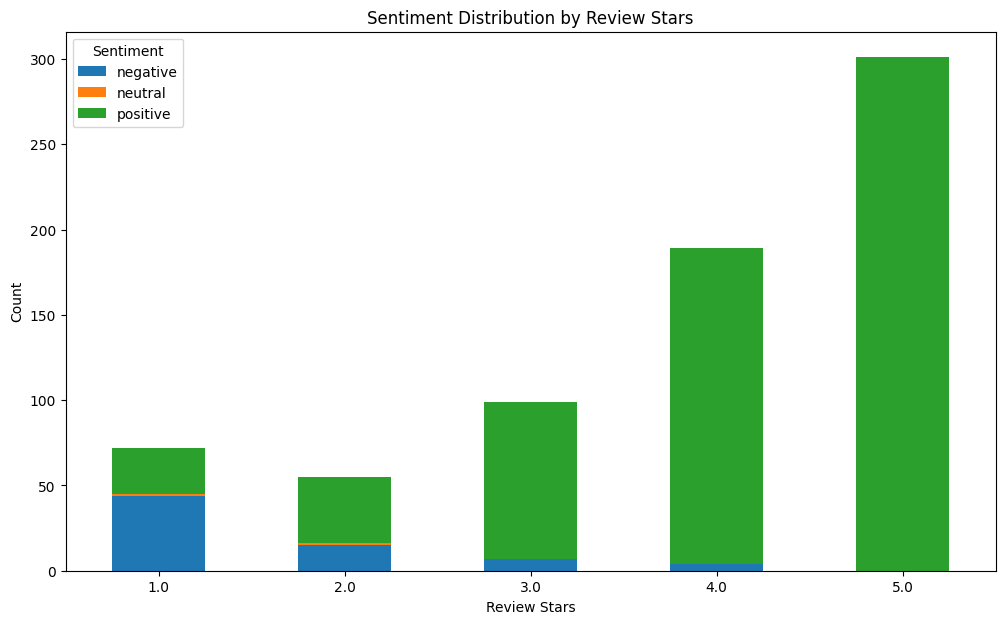

In [62]:
# Group by review stars and count sentiments
stars_sentiment = restaurant_open_df.groupby('review_stars')['sentiment'].value_counts().unstack()

# Plotting the results
stars_sentiment.plot(kind='bar', stacked=True, figsize=(12, 7))
plt.title('Sentiment Distribution by Review Stars')
plt.xlabel('Review Stars')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Sentiment')
plt.show()


In [69]:
from collections import Counter

# Count words in positive and negative reviews
positive_words = ' '.join(restaurant_open_df[restaurant_open_df['sentiment'] == 'positive']['cleaned_text'])
negative_words = ' '.join(restaurant_open_df[restaurant_open_df['sentiment'] == 'negative']['cleaned_text'])

# Get the most common words
positive_word_counts = Counter(positive_words.split()).most_common(10)
negative_word_counts = Counter(negative_words.split()).most_common(10)

print("Most common words in positive reviews:", positive_word_counts)
print("Most common words in negative reviews:", negative_word_counts)


Most common words in positive reviews: [('food', 449), ('good', 410), ('place', 384), ('great', 357), ('time', 242), ('service', 215), ('get', 204), ('like', 201), ('one', 182), ('back', 166)]
Most common words in negative reviews: [('food', 48), ('place', 41), ('time', 37), ('go', 32), ('one', 32), ('back', 30), ('like', 29), ('would', 28), ('service', 28), ('even', 28)]


<ipython-input-70-5417a5b57cbf>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=positive_df, x='word', y='count', palette='viridis')
<ipython-input-70-5417a5b57cbf>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=negative_df, x='word', y='count', palette='magma')


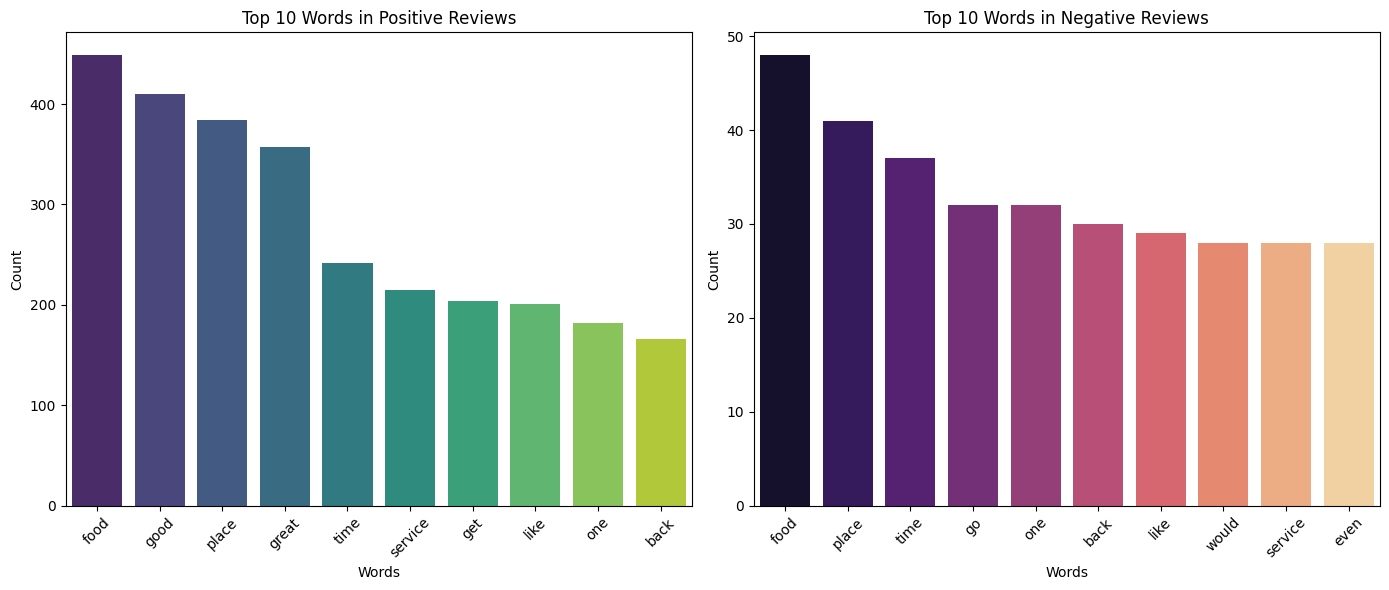

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame for positive and negative words
positive_df = pd.DataFrame(positive_word_counts, columns=['word', 'count'])
negative_df = pd.DataFrame(negative_word_counts, columns=['word', 'count'])

# Set up the matplotlib figure
plt.figure(figsize=(14, 6))

# Plot for positive words
plt.subplot(1, 2, 1)
sns.barplot(data=positive_df, x='word', y='count', palette='viridis')
plt.title('Top 10 Words in Positive Reviews')
plt.xlabel('Words')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Plot for negative words
plt.subplot(1, 2, 2)
sns.barplot(data=negative_df, x='word', y='count', palette='magma')
plt.title('Top 10 Words in Negative Reviews')
plt.xlabel('Words')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [71]:
# Import libraries for machine learning
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix


In [72]:
# Split the dataset into features (X) and labels (y)
X = restaurant_open_df['cleaned_text']
y = restaurant_open_df['sentiment']

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [73]:
# Convert text data to a matrix of token counts
count_vectorizer = CountVectorizer()
X_train_counts = count_vectorizer.fit_transform(X_train)

# Transform the counts to a normalized tf or tf-idf representation
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)


In [75]:
# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train_tfidf, y_train)

# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train_tfidf, y_train)

# Support Vector Machine
svm_model = SVC()
svm_model.fit(X_train_tfidf, y_train)


SVC()

In [77]:
# Convert test data to counts
X_test_counts = count_vectorizer.transform(X_test)

# Transform the counts to a normalized tf or tf-idf representation
X_test_tfidf = tfidf_transformer.transform(X_test_counts)


In [78]:
# Predictions
lr_predictions = lr_model.predict(X_test_tfidf)
rf_predictions = rf_model.predict(X_test_tfidf)
svm_predictions = svm_model.predict(X_test_tfidf)


In [79]:
# Evaluation function
def evaluate_model(predictions, y_test, model_name):
    print(f"Model: {model_name}")
    print(classification_report(y_test, predictions))
    print(confusion_matrix(y_test, predictions))

# Evaluate each model
evaluate_model(lr_predictions, y_test, "Logistic Regression")
evaluate_model(rf_predictions, y_test, "Random Forest")
evaluate_model(svm_predictions, y_test, "Support Vector Machine")


Model: Logistic Regression
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00        10
    positive       0.93      1.00      0.96       134

    accuracy                           0.93       144
   macro avg       0.47      0.50      0.48       144
weighted avg       0.87      0.93      0.90       144

[[  0  10]
 [  0 134]]
Model: Random Forest
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00        10
    positive       0.93      1.00      0.96       134

    accuracy                           0.93       144
   macro avg       0.47      0.50      0.48       144
weighted avg       0.87      0.93      0.90       144

[[  0  10]
 [  0 134]]
Model: Support Vector Machine
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00        10
    positive       0.93      1.00      0.96       134

    accuracy                           0.93       144
   m

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m